# Сарказм

## Сайты


## Корова говорит

In [1]:
pip install cowsay

#Фильтр

In [55]:
filter=['bitch', 'fuck', 'assault', 'kill', 'shit', 'disgusting', 'fxck', 'gay', 'smoke', 'die', 'wtf', 'woo ha', 'nipples', 'communist', 'breast', 'penis', 'Israel', 'virgin', 'lesbian', 'queer', 'LGBT', 'military', 'idiot', 'fck', 'harm', 'raped', 'smash', 'ripped apart', 'suicide', 'porno', 'pron', 'dick', 'vagina', 'clitor', 'death', 'racist', 'misogyn', 'feminist', 'rape', 'damn', 'Akbar', 'dirt', 'slut', 'suck', 'cock', 'attractive', 'vaping', 'serve', 'fascist', 'nazi', 'nazis', 'fucking', 'turned on', 'sex', 'hitler', 'hottest', 'ass', 'bomb', 'terrorist']

#Код

## Животные

In [3]:
#раскраска животных
class Colors:
    bold = '\033[1m'  # Bold
    uline = '\033[4m'  # Underline
    endc = '\033[0m'  # End of color line

In [4]:
colors = [
    "\033[31m",  # Красный
    "\033[32m",  # Зеленый
    "\033[33m",  # Желтый
    "\033[34m",  # Синий
    "\033[35m",  # Магента
    "\033[36m",  # Циан
    "\033[95m",  # Purple color
    "\033[94m",  # Blue color
    "\033[35m"
]

In [69]:
import cowsay
import random

def sarcastic_cowsay(option):
    # Словарь доступных персонажей
    characters = {
        1: cowsay.cheese,
        2: cowsay.cow,
        3: cowsay.daemon,
        4: cowsay.dragon,
        5: cowsay.fox,
        6: cowsay.ghostbusters,
        7: cowsay.kitty,
        8: cowsay.meow,
        9: cowsay.miki,
        10: cowsay.milk,
        11: cowsay.octopus,
        12: cowsay.pig,
        13: cowsay.stegosaurus,
        14: cowsay.trex,
        15: cowsay.turkey,
        16: cowsay.turtle,
        17: cowsay.tux
    }

    # Словарь с русскими именами персонажей
    character_names = {
        1: "сыр",
        2: "корова",
        3: "демон",
        4: "дракон",
        5: "лисица",
        6: "призраки",
        7: "котенок",
        8: "кот",
        9: "мики",
        10: "молоко",
        11: "осьминог",
        12: "свинья",
        13: "стегозавр",
        14: "ти-рекс",
        15: "индейка",
        16: "черепаха",
        17: "пингвин"
    }

    if option in characters:
        character = characters[option]
        character_name = character_names[option]
        random_color = colors[random.randint(0, len(colors) - 1)]
        character(f"{random_color}{Colors.bold}Даже я, {character_name}, вижу, что это сарказм.{Colors.endc}")
    else:
        cowsay.cow("Упс! Неправильный номер. Просто идеально.")

# Генерируем случайное число от 1 до 17
random_number = random.randint(1, 17)

In [ ]:
sarcastic_cowsay(random_number)

  _________________________________________________
 /                                                 \
| Даже я, осьминог, вижу, что это сарказм. |
|  Как видите, даже овощи смеются над вами!     |
 \                                                 /
                                                      \
                                                       \
                                                        \
                                                                         . . .
                                                                       .   ^   .
                                                                      .  ^ ^ ^  .
                                                                      .  ^ ^ ^  .
                                                                       .   ^    .
                                                                         . . .
                                                           _ _ _ _ _ _ _|     |_ _ _ _ _ _


## Загрузка данных и обучение

In [6]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c6778f8c946dfff25556f99902d2b3d13de26629e881df2ded54ecbf87bff9a5
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [8]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

Не забудьте обновить, если будете тыкаться. Это путь на мой диск

In [7]:
PATH_TO_DATA = '/content/drive/MyDrive/2trim/4 курс/Нейронки/Итоговое/train-balanced-sarcasm.csv'

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
train_df = pd.read_csv(PATH_TO_DATA)
train_df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010771 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


In [12]:
#удаляем пустые комментарии
train_df.dropna(subset=['comment'], inplace=True)

In [13]:
#проверим баланс
train_df['label'].value_counts()

,count
label,
0,505403
1,505368


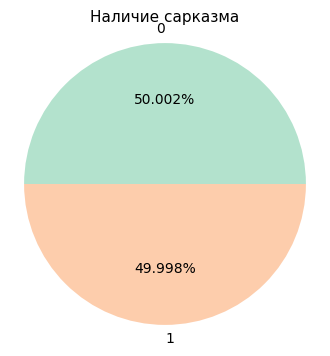

In [ ]:
#визуализация соотношений классов
label_counts = train_df['label'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(label_counts,
        labels=label_counts.index,
        autopct='%1.3f%%', #форматирование процентов
        colors=sns.color_palette('Pastel2'))

# Добавление заголовка
plt.title('Наличие сарказма', fontsize=11)
plt.axis('equal')
plt.show()

всё сбалансировано, никакие методы не применяем

## Обучение

### Более детальный анализ

In [14]:
#делим на обучающую и тестовую выборки
train_texts, valid_texts, y_train, y_valid = \
        train_test_split(train_df['comment'], train_df['label'], random_state=17)

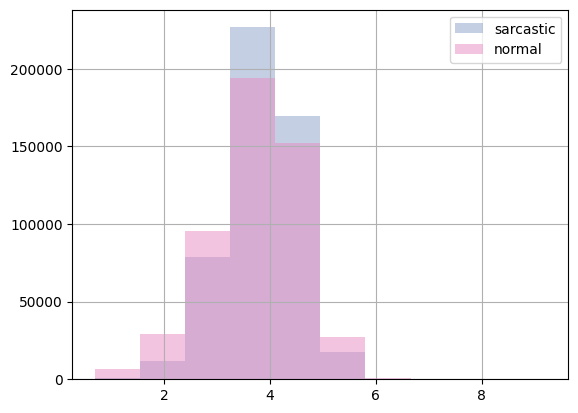

In [15]:
# Посмотрим график
train_df.loc[train_df['label'] == 1, 'comment'].str.len().apply(np.log1p).hist(label='sarcastic', alpha=.5, color = sns.color_palette('Set2')[2])
train_df.loc[train_df['label'] == 0, 'comment'].str.len().apply(np.log1p).hist(label='normal', alpha=.5, color = sns.color_palette('Set2')[3])
plt.legend();

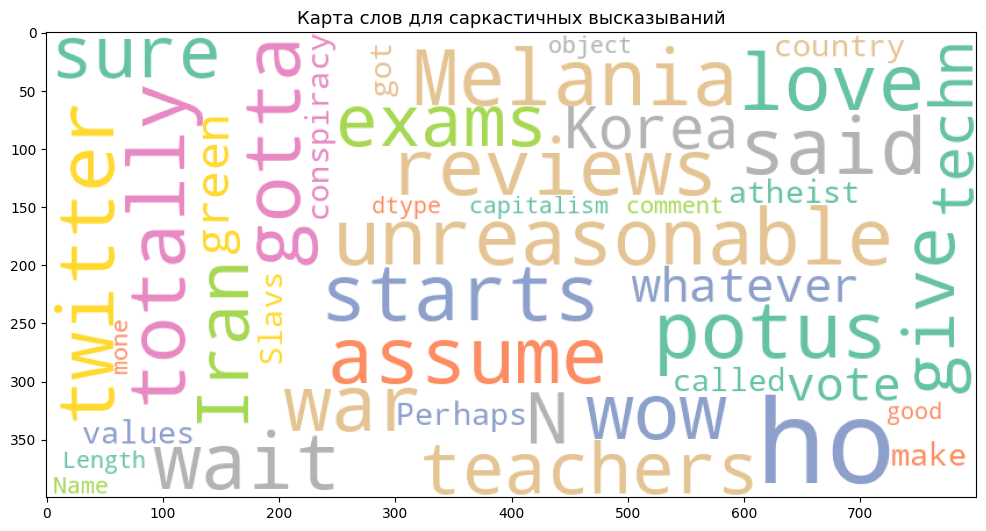

In [16]:
# Выведем карту слов
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(background_color='white', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100,
                random_state = 17, width=800, height=400, colormap='Set2')
# Для 1
plt.figure(figsize=(12, 10))
plt.title('Карта слов для саркастичных высказываний', fontsize=13)
wordcloud.generate(str(train_df.loc[train_df['label'] == 1, 'comment']))
plt.imshow(wordcloud);

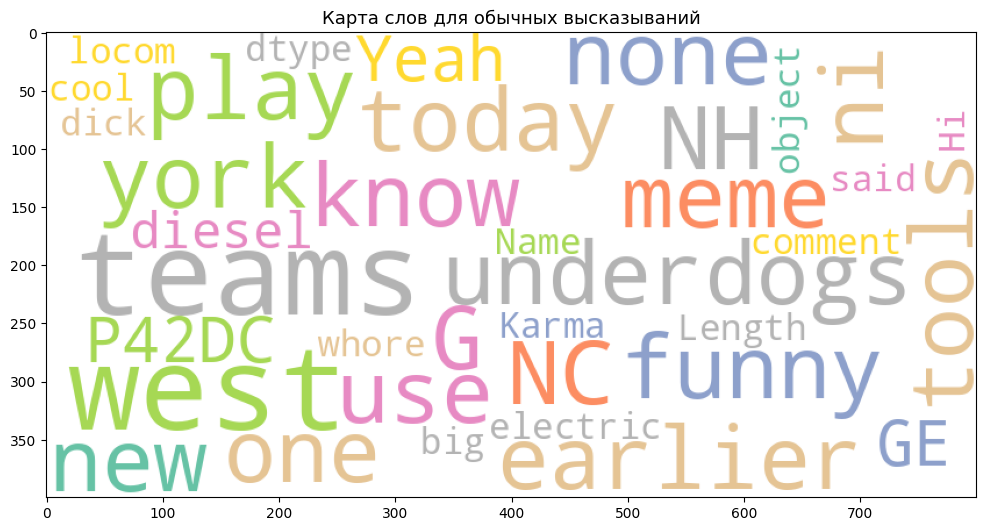

In [ ]:
# Для 0
plt.figure(figsize=(12, 10))
plt.title('Карта слов для обычных высказываний', fontsize=13)
wordcloud.generate(str(train_df.loc[train_df['label'] == 0, 'comment']))
plt.imshow(wordcloud);

Давайте проанализируем, являются ли некоторые субредакты в среднем более "саркастичными", чем другие

In [ ]:
sub_df = train_df.groupby('subreddit')['label'].agg(['size', 'mean', 'sum'])
sub_df.sort_values(by='sum', ascending=False).head(10)

,size,mean,sum
subreddit,,,
AskReddit,65674,0.401453,26365
politics,39493,0.605348,23907
worldnews,26375,0.642540,16947
leagueoflegends,21034,0.542312,11407
pcmasterrace,18987,0.566651,10759
news,16891,0.603457,10193
funny,17939,0.451474,8099
pics,16152,0.484336,7823
todayilearned,14159,0.547567,7753


In [ ]:
sub_df[sub_df['size'] > 1000].sort_values(by='mean', ascending=False).head(10)

,size,mean,sum
subreddit,,,
creepyPMs,5466,0.784303,4287
MensRights,3355,0.680775,2284
ShitRedditSays,1284,0.661994,850
worldnews,26375,0.642540,16947
Libertarian,2562,0.640125,1640
atheism,7377,0.639555,4718
Conservative,1881,0.639553,1203
TwoXChromosomes,1560,0.632692,987
fatlogic,2356,0.623090,1468


Не дает особого понимания. Сейчас посмотрим по авторам.

In [ ]:
sub_df = train_df.groupby('author')['label'].agg(['size', 'mean', 'sum'])
sub_df[sub_df['size'] > 300].sort_values(by='mean', ascending=False).head(10)

,size,mean,sum
author,,,
NeonDisease,422,0.500000,211
ShyBiDude89,404,0.500000,202
ivsciguy,342,0.500000,171
mad-n-fla,318,0.500000,159
mindlessrabble,302,0.500000,151
pokemon_fetish,432,0.500000,216
Biffingston,845,0.499408,422


Для авторов то же самое, не дает особого понимания. За исключением того факта, что были выбраны чьи-то комментарии - мы можем видеть одинаковое количество саркастических и несаркастических комментариев.

In [ ]:
sub_df = train_df[train_df['score'] >= 0].groupby('score')['label'].agg(['size', 'mean', 'sum'])
sub_df[sub_df['size'] > 300].sort_values(by='mean', ascending=False).head(10)

,size,mean,sum
score,,,
0,58141,0.612752,35626
20,3096,0.561370,1738
34,1071,0.556489,596
26,1874,0.554429,1039
59,315,0.552381,174
18,3951,0.551759,2180
13,7277,0.546929,3980
17,4404,0.545867,2404
40,722,0.545706,394


In [ ]:
sub_df = train_df[train_df['score'] < 0].groupby('score')['label'].agg(['size', 'mean', 'sum'])
sub_df[sub_df['size'] > 300].sort_values(by='mean', ascending=False).head(10)

,size,mean,sum
score,,,
-14,537,0.698324,375
-8,1852,0.696004,1289
-9,1503,0.691284,1039
-6,3088,0.688795,2127
-12,776,0.684278,531
-5,4134,0.678520,2805
-3,6736,0.676069,4554
-2,11924,0.675948,8060
-4,5436,0.673473,3661


### Обучение модели

In [17]:
# создаём биграммы, устанавливаем ограничение на максимальное количество объектов
# и минимальную частоту слов
tf_idf = TfidfVectorizer(ngram_range=(1, 2), max_features=50000, min_df=2)

# мультиномиальная логистическая регрессия, также известная как классификатор softmax
logit = LogisticRegression(C=1, n_jobs=4, solver='lbfgs',
                           random_state=17, verbose=1)
# sklearn's конвейер
tfidf_logit_pipeline = Pipeline([('tf_idf', tf_idf),
                                 ('logit', logit)])

In [18]:
%%time
tfidf_logit_pipeline.fit(train_texts, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


CPU times: user 32.3 s, sys: 1.33 s, total: 33.6 s
Wall time: 48 s


Pipeline(steps=[('tf_idf',
                 TfidfVectorizer(max_features=50000, min_df=2,
                                 ngram_range=(1, 2))),
                ('logit',
                 LogisticRegression(C=1, n_jobs=4, random_state=17,
                                    verbose=1))])

In [19]:
%%time
valid_pred = tfidf_logit_pipeline.predict(valid_texts)

CPU times: user 8.27 s, sys: 88.8 ms, total: 8.36 s
Wall time: 8.61 s


In [20]:
print('accuracy_score = {:.4f}'.format(accuracy_score(y_valid, valid_pred)))

accuracy_score = 0.7193


Оценка хорошая

Посмотрим матрицу ошибок

In [21]:
def plot_confusion_matrix(actual, predicted, classes,
                          normalize=False,
                          title='Матрица ошибок', figsize=(7,7),
                          cmap="Pastel2", path_to_save_fig=None):
    import itertools
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(actual, predicted).T
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap="Pastel2")
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Предсказанные')
    plt.xlabel('Истинные')

    if path_to_save_fig:
        plt.savefig(path_to_save_fig, dpi=300, bbox_inches='tight')

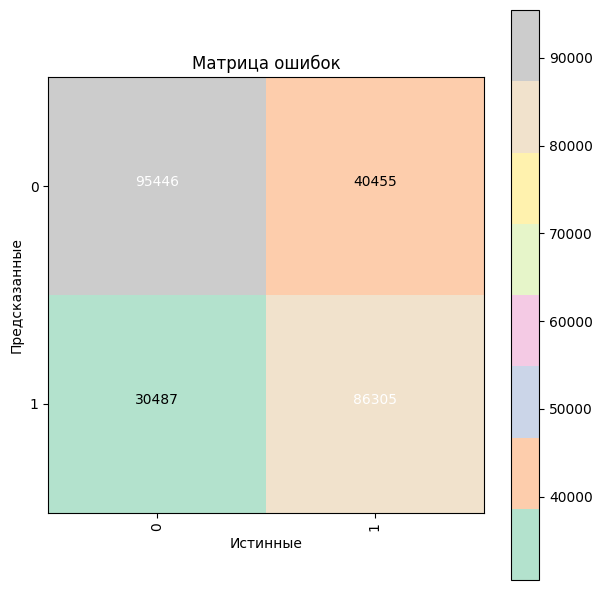

In [ ]:
plot_confusion_matrix(y_valid, valid_pred,
                      tfidf_logit_pipeline.named_steps['logit'].classes_, figsize=(6, 6))

Действительно, мы можем распознать некоторые фразы, свидетельствующие о сарказме. Например, "да, конечно".

Lime

In [22]:
# Импорт необходимых библиотек
from lime import lime_text
from lime.lime_text import LimeTextExplainer

# Создание экземпляра объяснителя
explainer = LimeTextExplainer(class_names=['Not Sarcastic', 'Sarcastic'])

# Выбор примера для объяснения (например, первый комментарий в валидационном наборе)
idx = 43210	# Вы можете изменить индекс на любой другой, чтобы объяснить другой комментарий
text_to_explain = valid_texts.iloc[idx]

# Получение предсказаний вероятностей
predict_proba = tfidf_logit_pipeline.predict_proba

# Объяснение примера
exp = explainer.explain_instance(text_to_explain, predict_proba, num_features=10)

# Визуализация объяснения
exp.show_in_notebook(text=True)


### Совершенствование модели

In [23]:
subreddits = train_df['subreddit']
train_subreddits, valid_subreddits = train_test_split(subreddits, random_state=17)

У нас будут отдельные векторизаторы Tf-Idf для комментариев и для тематик. Также можно придерживаться конвейера, но в этом случае это становится немного менее простым.

In [24]:
tf_idf_texts = TfidfVectorizer(ngram_range=(1, 2), max_features=50000, min_df=2)
tf_idf_subreddits = TfidfVectorizer(ngram_range=(1, 1))

Выполняем преобразования отдельно для комментариев и тем.

In [25]:
%%time
X_train_texts = tf_idf_texts.fit_transform(train_texts)
X_valid_texts = tf_idf_texts.transform(valid_texts)

CPU times: user 46 s, sys: 1.15 s, total: 47.1 s
Wall time: 57 s


In [ ]:
X_train_texts.shape, X_valid_texts.shape

((758078, 50000), (252693, 50000))

In [26]:
%%time
X_train_subreddits = tf_idf_subreddits.fit_transform(train_subreddits)
X_valid_subreddits = tf_idf_subreddits.transform(valid_subreddits)

CPU times: user 3.28 s, sys: 12.7 ms, total: 3.3 s
Wall time: 3.31 s


In [ ]:
X_train_subreddits.shape, X_valid_subreddits.shape

((758078, 13238), (252693, 13238))

Теперь сложим всё вместе

In [27]:
from scipy.sparse import hstack
X_train = hstack([X_train_texts, X_train_subreddits])
X_valid = hstack([X_valid_texts, X_valid_subreddits])

In [ ]:
X_train.shape, X_valid.shape

((758078, 63238), (252693, 63238))

Теперь будет тренировать ту же логистическую регрессию

In [28]:
logit.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


LogisticRegression(C=1, n_jobs=4, random_state=17, verbose=1)

In [29]:
%%time
valid_pred = logit.predict(X_valid)

CPU times: user 20.8 ms, sys: 893 µs, total: 21.7 ms
Wall time: 37 ms


In [ ]:
print('accuracy_score = {:.4f}'.format(accuracy_score(y_valid, valid_pred)))

accuracy_score = 0.7225


Точность немного возрасла, но, конечно, не сильно

### Поиграем

А теперь немного побалуемся, определяя сарказм!

In [78]:
#тут функция, чтобы достать рандомное предложение и значение его сарказма
def WordsAndSarcasm(index):
  if not any(word.lower() in valid_texts.iloc[index] for word in filter):
    print(f"{valid_subreddits.iloc[index]} пишет: '{valid_texts.iloc[index]}'. Это сказано с сарказмом?")
    if (valid_pred[index] == 0):
      sarcastic_cowsay(random.randint(1, 17))
    else:
      print('Сарказм не был обнаружен, а значит ругаться некому.')
  else:
    WordsAndSarcasm(random.randint(0, valid_texts.shape[0]))


WordsAndSarcasm(random.randint(0, valid_texts.shape[0]))

Warthunder пишет: 'Or those on PS4'. Это сказано с сарказмом?
  _________________________________________________
 /                                                 \
| Даже я, призраки, вижу, что это сарказм. |
|                                               |
 \                                                 /
                                                         \
                                                          \
                                                           \
                                                            \
                                                                        __---__
                                                                     _-       /--______
                                                                __--( /     \ )XXXXXXXXXXX\v.
                                                              .-XXX(   O   O  )XXXXXXXXXXXXXXX-
                                                             /XXX(       U     )     